[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed
NaN in data! Fixed.
[[0.14726591 0.00740369 0.28348061 0.90560406]
 [0.14726591 0.00740369 0.28348061 0.90560406]
 [0.16287018 0.00718103 0.28348061 0.93958657]
 ...
 [0.77007934 0.87085282 0.16723317 0.74721776]
 [0.76770556 0.87096412 0.16723317 0.75616054]
 [0.76770556 0.87096412 0.17036029 0.75616054]]


array([[0.13296747, 0.13296747, 0.12935341, ..., 0.14044801, 0.13813977,
        0.13813977],
       [0.13296747, 0.12935341, 0.12935341, ..., 0.13813977, 0.13813977,
        0.1389286 ],
       [0.12935341, 0.12935341, 0.134033  , ..., 0.13813977, 0.1389286 ,
        0.1389286 ],
       ...,
       [0.79062285, 0.79780486, 0.79780486, ..., 0.75404546, 0.75404546,
        0.77007934],
       [0.79780486, 0.79780486, 0.79073449, ..., 0.75404546, 0.77007934,
        0.77007934],
       [0.79780486, 0.79073449, 0.79073449, ..., 0.77007934, 0.77007934,
        0.76770556]])

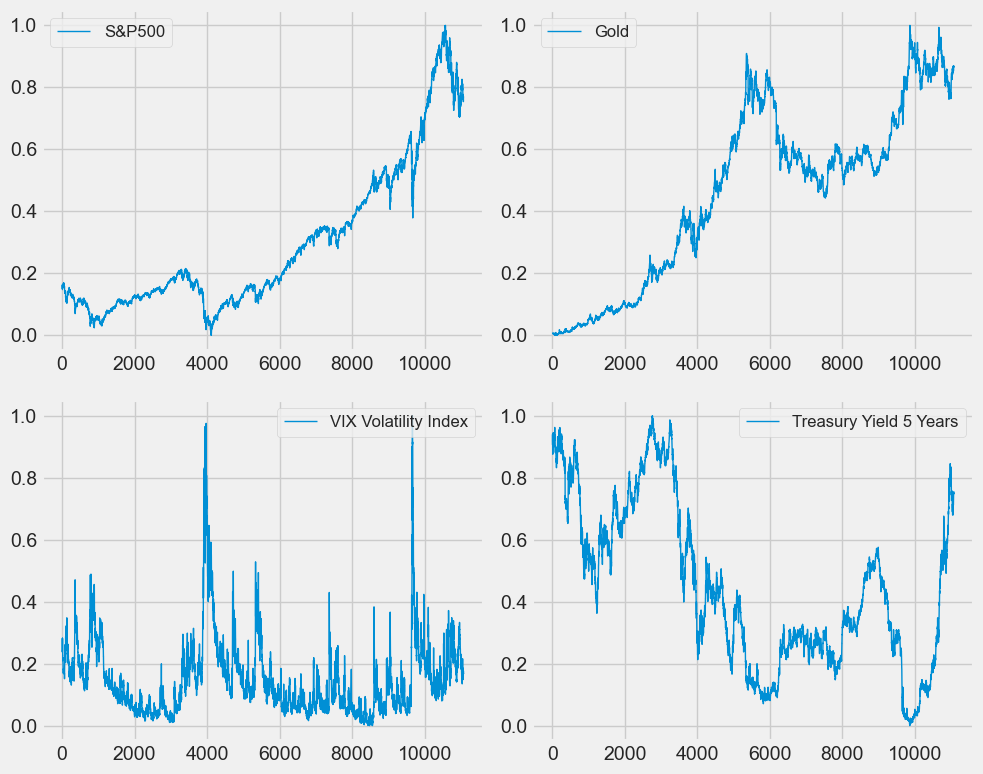

In [482]:
import sys
sys.path.insert(1, r"C:/Users/mihao/OneDrive - Univerza v Ljubljani/Doktorski_studij/Delo/Evolving transformer")
sys.path.insert(1, r"C:\Users\Miha\OneDrive - Univerza v Ljubljani\Doktorski_studij\Delo\Evolving transformer")
from importlib import reload 
import data.dataclass_module as dataclass_module
reload(dataclass_module)

input_length = 150
output_length = 30
output_steps_ahead = 1
database = dataclass_module.StockData(input_length,output_length,output_steps_ahead)
database.display_data_norm()

#print(database.data_dropped)
print(database.data_norm)

#print(database.datasnp_dropped)
scalar = database.scalar

database.dataset_input
database.dataset_output


In [483]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

training_part = 0.8

size_training = int(len(database.data_norm)*training_part)
size_valid = int((len(database.data_norm) - size_training)/2)
data_train, data_val, data_test = database.data_norm[0:size_training,:], database.data_norm[size_training:(len(database.data_norm)-size_valid),:], database.data_norm[(len(database.data_norm)-size_valid):,:]

print(data_train.shape)
print(data_val.shape)
print(data_test.shape)

train_dataset = dataclass_module.Stockdataset(data_train, input_length, output_length)
valid_dataset = dataclass_module.Stockdataset(data_val, input_length, output_length)
test_dataset = dataclass_module.Stockdataset(data_test, input_length, output_length)
whole_dataset = dataclass_module.Stockdataset(database.data_norm, input_length, output_length)

print(test_dataset.__getitem__(1)[0].shape)
print(train_dataset.__getitem__(1)[0].shape)
print(whole_dataset.__getitem__(0)[0].shape)

training_batch_size = 313; #513
batch_size = training_batch_size
train_dataloader = DataLoader(train_dataset, batch_size, drop_last = True, shuffle=True) #drop_last = True ignores last batch is data is not divisable by batch_size
valid_dataloader = DataLoader(valid_dataset, batch_size, drop_last = True, shuffle=True) #drop_last = True ignores last batch is data is not divisable by batch_size
test_dataloader = DataLoader(test_dataset, batch_size, drop_last = True, shuffle=True)

whole_dataloader = DataLoader(whole_dataset, batch_size, drop_last = True, shuffle=False)

# Check if CUDA is available
if torch.cuda.is_available():
    # Get the current selected device
    device = torch.device('cuda')
else:
    # If CUDA is not available, use CPU
    device = torch.device('cpu')

print(f"Using device: {device}")



(8858, 4)
(1108, 4)
(1107, 4)
torch.Size([150, 4])
torch.Size([150, 4])
torch.Size([150, 4])
Using device: cuda


In [484]:
import utils.loss_module as loss_module
reload(loss_module)

loss_fun_con = nn.MSELoss()
#loss_fun_member = nn.CrossEntropyLoss()
loss_fun_centers = nn.MSELoss()
loss_fun_recon = nn.MSELoss()
loss_fun_assign = torch.nn.KLDivLoss(size_average=None, reduce=None, reduction="sum", log_target=True) #vhodi morajo bit logaritmirani
loss_fun_balance = torch.nn.KLDivLoss(size_average=None, reduce=None, reduction="sum", log_target=True) #vhodi morajo bit logaritmirani
loss_fun_Kmeans = loss_module.KMeansClusteringLoss()
loss_fun_local = loss_module.LocalityPreservingLoss()
loss_fun_DQA = loss_module.QuadraticDiscriminantAnalysis()
loss_fun_GMM = loss_module.GaussianMixtureLoss()
loss_fun_FCM = loss_module.FuzzyCMeansClusteringLoss()
loss_fun_overlap = loss_module.OverlappingLoss()
loss_fun_ContrastiveLoss = loss_module.FuzzyContrastiveLoss(0.2)
loss_fun_FuzzyCMeansLossWithPenalties = loss_module.FuzzyCMeansLossWithPenalties()
loss_fun_TotalVariationLoss = loss_module.TotalVariationLoss()
loss_fun_orthogonality_penalty = loss_module.OrthogonalityLoss()
loss_fun_EntropyLoss = loss_module.EntropyLoss(1)
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture


In [485]:
from utils import display_module
reload(display_module)
from utils import checks_module
reload(checks_module)

import models.neuro_fuzzy_module as neuro_fuzzy_module
reload(neuro_fuzzy_module)
import models.feed_forward_module as feed_forward_module
reload(feed_forward_module)

import models.LSTM_encoder_module as LSTM_encoder_module
reload(LSTM_encoder_module)

<module 'models.LSTM_encoder_module' from 'C:\\Users\\Miha\\OneDrive - Univerza v Ljubljani\\Doktorski_studij\\Delo\\Evolving transformer\\models\\LSTM_encoder_module.py'>

In [486]:
from importlib import reload 
import utils.ellipse_module as ellipse_module
reload(ellipse_module)


<module 'utils.ellipse_module' from 'C:\\Users\\Miha\\OneDrive - Univerza v Ljubljani\\Doktorski_studij\\Delo\\Evolving transformer\\utils\\ellipse_module.py'>

In [487]:
import torch.nn as nn

class NeuroCluster(nn.Module):
    def __init__(self, par_input_channels, par_input_length, par_output_dim, par_output_length, par_hidden_size, par_num_layers,
                 par_num_heads, par_embed_dim, par_num_clusters, par_regressor_dim, par_order, par_latent_dim):
        super(NeuroCluster, self).__init__()
        self.num_layers = par_num_layers
        self.input_channels = par_input_channels
        self.input_length = par_input_length
        self.output_dim = par_output_dim
        self.output_length = par_output_length
        self.hidden_size = par_hidden_size
        self.num_clusters = par_num_clusters
        self.num_heads = par_num_heads
        self.embed_dim = par_embed_dim
        self.regressor_dim = par_regressor_dim
        self.order = par_order
        self.latent_dim = par_latent_dim


        self.neurofuzzy = neuro_fuzzy_module.NeuroFuzzyLayer(self.input_length, self.output_dim, self.output_length, self.num_clusters, self.latent_dim, self.regressor_dim, self.order)

    def forward(self, x):
        self.x = x.reshape(-1, self.input_length, 1, self.latent_dim)
        self.y = self.neurofuzzy(x, x)

        return self.y


In [488]:

par_num_heads = 4
par_num_clusters = 16
par_input_channels = 4
par_embed_dim = 128 #Must be devisible by 2 due to embedding and by the par_num_heads
par_output_dim = 1
par_hidden_size = 32
par_num_layers = 2
par_order = 2
par_regressor_dim = par_order
par_latent_dim = 4
par_input_length = input_length
par_output_length = output_length
par_min_clump = 0
par_max_clump = 10


In [489]:
model = NeuroCluster(par_input_channels, par_input_length, par_output_dim, par_output_length, par_hidden_size, par_num_layers,
                  par_num_heads,par_embed_dim, par_num_clusters, par_regressor_dim, par_order, par_latent_dim).to(device)

In [490]:
import matplotlib.pyplot as plt

def plot_llm(llm_data):
    # Convert the data to a NumPy array
    llm_np = llm_data.detach().cpu().numpy()

    # Plot the data
    plt.plot(llm_np)
    plt.xlabel('Time')
    plt.ylabel('LLM')
    plt.title('LLM over Time')
    plt.show()

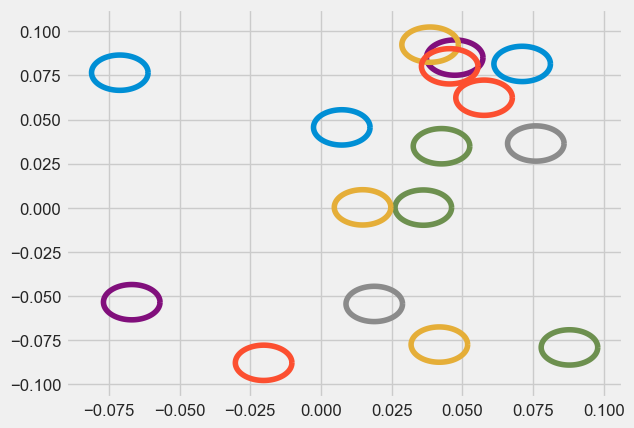

In [491]:
from IPython import display
from numpy.linalg import inv
import matplotlib.pyplot as plt
import pylab as pl

sigma_inv = model.neurofuzzy.sigma_inv
sigma_inv = torch.matmul((sigma_inv), torch.transpose((sigma_inv), 2, 1))
sigma = inv(sigma_inv.detach().cpu().numpy())[:,0:2,0:2]
mu = model.neurofuzzy.mu.detach().cpu().numpy()[:,0:2]
ellipse = ellipse_module.Ellipse(sigma,mu,1)
ellipse_points = ellipse.compute_confidence_ellipse()
ellipse_points = np.einsum('ijk->jik', ellipse_points)
plt.plot(ellipse_points[:,:,0],ellipse_points[:,:,1]) 
display.display(pl.gcf())   
display.clear_output(wait=True)


In [492]:

def train(dataloader, loss_name, epoch):
    
    model.train()
    #alpha = 0.5
    loss_sum = 0
    x_ant = np.empty((0,1,par_latent_dim))    
    
    for batch, item in enumerate(dataloader):
        x, y = item
        x = x.to(device)
        y = y.to(device)
  
        if torch.isnan(x).any() == True:           
            print("ERROR training input data!")
        if torch.isnan(y).any() == True:           
            print("ERROR training output data!!")

        out = model(x)
        
        if torch.isnan(out).any() == True:           
            print("ERROR Output!")

        #sigma_target = model.neurofuzzy.compute_sigma(model.z).reshape(num_clusters,cluster_dim,cluster_dim)
        
        loss = torch.zeros(1).to(device)
        loss_kmeans = loss_fun_Kmeans(model.x, model.neurofuzzy.mu.detach())
        if torch.isnan(loss_kmeans) == True:           
            print("ERROR loss!")
        loss_FCM = loss_fun_FCM(model.x, model.neurofuzzy.mu, model.neurofuzzy.sigma_inv)

        #loss_GMM = loss_fun_GMM(model.z, model.neurofuzzy.mu, model.neurofuzzy.sigma_inv)       
        loss_con = loss_fun_con(out.reshape(batch_size, par_output_dim,-1), y.reshape(batch_size, par_output_dim,-1))


        if loss_name == 'all':

            #total_loss, loss_FCM_, loss_KM, equal_spread_loss, pull_towards_clusters_loss, column_norm_loss = loss_fun_FuzzyCMeansLossWithPenalties(model.z, model.neurofuzzy.mu, model.neurofuzzy.sigma_inv,1,1)
            #loss_mu = loss_fun_centers(mu_target, model.neurofuzzy.mu)
            #loss_sigma = loss_fun_sigma(sigma_target, model.neurofuzzy.mu)
            #loss_DQA = loss_fun_DQA(model.z, model.neurofuzzy.mu, model.neurofuzzy.sigma_inv)
            #loss_GMM = loss_fun_GMM(model.z, model.neurofuzzy.mu, model.neurofuzzy.sigma_inv)
            #loss_assign = loss_fun_assign(torch.nn.functional.log_softmax(model.neurofuzzy.psi, -1), compute_distibution(model.neurofuzzy.d2.reshape(-1,1,num_clusters)))
            
            #loss_ballance = loss_fun_balance(model.neurofuzzy.compute_psi(model.z.detach())/batch_size,
            #                                torch.nn.functional.log_softmax(1/par_num_clusters*torch.ones(1,par_num_clusters),dim=1).to(device))
            loss_ballance = loss_fun_balance(torch.nn.functional.log_softmax(torch.mean(model.neurofuzzy.compute_psi(model.z),dim = 0),dim = 1),
                                             torch.nn.functional.log_softmax(1/par_num_clusters*torch.ones(1,par_num_clusters),dim=1).to(device))
            #loss_psi = -torch.sum(1/torch.log(model.neurofuzzy.compute_psi(model.z)))/batch_size
            #loss_psi = -torch.sum(torch.log(model.neurofuzzy.compute_psi(model.z))/batch_size)
            loss_overlap = loss_fun_overlap(model.neurofuzzy.mu, model.neurofuzzy.sigma_inv.detach())
            #loss_ContrastiveLoss =  loss_fun_ContrastiveLoss(model.z, model.neurofuzzy.mu.detach(), model.neurofuzzy.sigma_inv.detach())
            #TotalVariationLoss = loss_fun_TotalVariationLoss(model.neurofuzzy.x_LLM, model.neurofuzzy.y_LLM)
            #orthogonality_penalty =  loss_fun_orthogonality_penalty(model.neurofuzzy.x_LLM)
            #EntropyLoss = loss_fun_EntropyLoss(model.neurofuzzy.mu, model.neurofuzzy.sigma_inv, model.z)
            #loss_member = loss_fun_member(model.neurofuzzy.compute_psi(model.z), model.member)
            #SmoothRangeLossX = loss_fun_SmoothRangeLoss(model.neurofuzzy.x_LLM)
            #SmoothRangeLossY = loss_fun_SmoothRangeLoss(model.neurofuzzy.y_LLM)
            #loss = loss + loss_recon  + loss_centers
            #loss = loss + loss_recon*1e4  + loss_con*1e4 + loss_kmeans*1e2 + loss_ballance# loss + loss_recon  + loss_con + loss_FCM + loss_ContrastiveLoss#
            #+loss_ContrastiveLoss
            loss1 = loss_con*1e4 +loss_recon*1e4#+ equal_spread_loss + pull_towards_clusters_loss +loss_ContrastiveLoss +loss_overlap#  + EntropyLoss  + 1e5*loss_ballance
            loss2 = loss_FCM*1e4 + loss_overlap + loss_ballance
            #if torch.all(loss_overlap > 5):
            #    loss = loss + TotalVariationLoss*1e-2
            loss = loss + loss1 + loss2
            
        if loss_name == 'encoder':
        

            #loss = loss + loss_recon  + loss_centers
            loss = loss + loss_recon*1e4#  + loss_centers               

        '''          
        if loss_name == "cluster":

            loss_FCM = loss_fun_FCM(model.z, model.neurofuzzy.mu, model.neurofuzzy.sigma_inv)

            #loss_ballance = loss_fun_balance(1/num_clusters*torch.ones(1,num_clusters).to(device), torch.log(torch.sum(model.neurofuzzy.psi,0)/batch_size))

            loss_GMM = loss_fun_GMM(model.z, model.neurofuzzy.mu, model.neurofuzzy.sigma_inv)
            loss_centers = loss_fun_centers(mu,model.neurofuzzy.mu)
            #loss = loss + loss_FCM + loss_centers
            loss = loss + loss_centers  + loss_kmeans   
            #breakpoint()
            if torch.isnan(loss) == True:           
                print(f"ERROR loss_clust {loss_clust}!")
                breakpoint()
        '''

       
            
        loss_sum = loss_sum + loss.item()  
        if torch.isnan(loss) == True:           
            print("ERROR loss!")

        x_ant = np.append(x_ant, model.z.detach().cpu().numpy(),axis=0)
        #hn = hn.detach() #detach hn is not a parameters and does not need to be updated!!!
        #cn = cn.detach()
        optimizer.zero_grad()
        #loss.backward()

        # Calculate gradients for each task
        loss.backward()

        # Now, update the model parameters
        optimizer.step()


        if torch.isnan(loss) == True:           
            print("ERROR loss!")
        optimizer.step()

        if torch.any(torch.isnan(model.neurofuzzy.mu)) == True:  
            print("ERROR mu!")

        
        if False: #(batch == np.floor(len(dataloader)/2)):  #(batch == len(dataloader) -1):    
            #if loss_name == "output" and True:  
                #display.display(pl.gcf())  
            #display.clear_output(wait=True)
            clear_output(wait=True)
            


            #plt.plot(model.x[0,:].detach().cpu().numpy().reshape(input_length, 1))
            #plt.plot(x[0,:,0].detach().cpu().numpy().reshape(input_length, 1))  
            #plt.plot(torch.sum(model.att_weights[0,:,:],dim = 0).detach().cpu().numpy().reshape(input_length, 1))             
            #display_module.plot_llm(model.neurofuzzy.x_LLM)
            display_module.visualize_llm(model.neurofuzzy.y_LLM, epoch)
            display_module.visualize_inputs(model.u, epoch,"train")

            print(f"Train loss: {loss_sum:>7f}")
                  # Extract the first channel from x and reshape the tensors
            x = x[:, :, 0].detach().cpu().numpy()
            y = y.detach().cpu().numpy()
            out = out[:, 0, :].detach().cpu().numpy()

            # Create time indices for the data
            time_indices_x = range(x.shape[1])
            time_indices_y = range(x.shape[1], x.shape[1] + y.shape[1])
            time_indices_y_all = range(x.shape[1]-par_order, x.shape[1] + y.shape[1])
            plt.figure(figsize=(10, 5))
            plt.plot(time_indices_x, x[-1], label='x (0th channel)')

            # Plot y and out
            plt.plot(time_indices_y, y[-1], label='y')
            plt.plot(time_indices_y, out[-1], label='y hat')
            plt.plot(time_indices_y_all, model.neurofuzzy.y_LLM_all[-1, 0, :].detach().cpu().numpy(), label='y hat')
            plt.legend()
            plt.title('Time Series Data')

                # Display clustering and membership
            display_module.display_clustering(model.neurofuzzy.sigma_inv, model.neurofuzzy.mu, model.z.detach().cpu().numpy())
            display_module.display_membership(model.neurofuzzy.compute_psi(model.z).detach().cpu().numpy(), model.z.detach().cpu().numpy(),epoch,'train')


            display_module.visualize_attention_weights(model.att_weights.detach().cpu(),epoch)

            checks_module.check_gradient_health(model)
            
            plt.show() 
            
    return loss_sum, x_ant


'''
model.neurofuzzy.mu.grad
model.neurofuzzy.sigma_inv.grad
model.neurofuzzy.msa.in_proj_weight.grad
model.neurofuzzy.msa.in_proj_bias.grad
model.neurofuzzy.msa.out_proj.weight.grad
model.neurofuzzy.msa.out_proj.bias.grad
model.neurofuzzy.fc_ant.weight.grad
model.neurofuzzy.fc_ant.bias.grad
model.neurofuzzy.fc_con.weight.grad
model.neurofuzzy.fc_con.bias.grad
model.neurofuzzy.fc_emb.weight.grad
model.neurofuzzy.fc_emb.bias.grad
model.neurofuzzy.input_layer_norm.weight.grad
model.neurofuzzy.input_layer_norm.bias.grad
model.neurofuzzy.ant_norm.weight.grad
model.neurofuzzy.ant_norm.bias.grad
'''

In [493]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os

def test(dataloader,epoch):
    loss_sum = 0

    # Turn off gradients for testing, saves memory and computations
    with torch.no_grad():
        for batch, (x,y) in enumerate(dataloader):
                
                print(f"Testing")
                x = x.to(device)
                y = y.to(device)
                out = model(x)
                loss = loss_fun_con(out.reshape(batch_size, par_output_dim, -1), y.reshape(batch_size, par_output_dim, -1))
                loss_sum = loss_sum + loss.item()
                
                # Extract the first channel from x and reshape the tensors
                x = x[:, :, 0].detach().cpu().numpy()
                y = y.detach().cpu().numpy()
                out = out[:, 0, :].detach().cpu().numpy()

                # Create time indices for the data
                time_indices_x = range(x.shape[1])
                time_indices_y = range(x.shape[1], x.shape[1] + y.shape[1])
                time_indices_y_all = range(x.shape[1]-par_order, x.shape[1] + y.shape[1])


                plt.figure(figsize=(10, 5))
                errors = [np.mean((y[i] - out[i]) ** 2) for i in range(y.shape[0])]
                variances = [np.var(out[i])+np.var(y[i]) for i in range(y.shape[0])]
                normalized_errors = [error / variance if variance != 0 else np.inf for error, variance in zip(errors, variances)]

                # Find the index of the sample with the lowest error
                min_error_index = np.argmin(normalized_errors)

                # Clear the console
                clear_output(wait=True)
                display_module.visualize_llm(model.neurofuzzy.y_LLM[min_error_index,:,:], epoch)
                display_module.visualize_inputs(model.u[min_error_index,:,:], epoch,"train")
        
                # Display clustering and membership
                display_module.display_clustering(model.neurofuzzy.sigma_inv, model.neurofuzzy.mu, model.z.detach().cpu().numpy())
                display_module.display_membership(model.neurofuzzy.compute_psi(model.z).detach().cpu().numpy(), model.z.detach().cpu().numpy(),epoch,'test')


                # Plot the corresponding x, y, and out
                plt.figure(figsize=(10, 5))
                plt.plot(time_indices_x, x[min_error_index], label='Input signal X')
                plt.plot(time_indices_y, y[min_error_index], label='Output Y')
                plt.plot(time_indices_y, out[min_error_index], label='Output Y forecast')
                plt.legend()

                tick_labels = [str(i) if i % 10 == 0 else '' for i in range(-input_length, output_length)]
                tick_positions = range(0, input_length + output_length)  # Adjust positions as needed

                plt.xticks(tick_positions, tick_labels)

                #plt.xticks(np.arange(-input_length, output_length, step=5))  # Adjust the step as needed
                plt.xlabel('Time Step')
                plt.ylabel('Normalized S&P500')
                plt.grid(False)
                plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)

                save_dir = '../images/forecast'

                os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist
                save_path = os.path.join(save_dir, f'forecast_{epoch}_{batch}.pdf')
                plt.savefig(save_path, format='pdf', transparent=True)
                plt.show()
                                
                display_module.visualize_attention_weights(model.att_weights.detach().cpu(),epoch)
                plt.show() 
         
        mse = loss_sum/len(dataloader)
        rmse = np.sqrt(mse) 
        print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}')
        


    return mse



for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

In [494]:
#%matplotlib inline
#%timeit
best_model = float('inf')
#plt.ioff()
train_iterations = 1
batch_size = training_batch_size
for i in range(train_iterations):

    for p in model.parameters():
        p.requires_grad = True 

    loss_name = "encoder"
    lr = 1e-2
    
    epochs = 0
    model.neurofuzzy.min_clump = 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr = lr)    
    for epoch in range(epochs): 
        
        print(f"Epoch {epoch} - " + loss_name)
        loss_train_encoder, _ = train(train_dataloader,loss_name,epoch)

    loss_name = "all"
    lr = 1e-3
          
    epochs = 202
    model.neurofuzzy.min_clump = 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr = lr)    
    for epoch in range(epochs): 
        
        print(f"Epoch {epoch} - " + loss_name)
        loss_train_encoder, _ = train(train_dataloader,loss_name,epoch)
        if (np.mod(epoch, 5) == 0): 
            
            loss_valid = test(valid_dataloader,epoch)
            if (best_model > loss_valid):
                best_model = loss_valid
                torch.save(model, f"model_neurofuzzy_cluster_{input_length}_{output_length}_{par_order}.pt")
                print(f"Save model loss: {loss_valid} - ")


Epoch 0 - all


RuntimeError: shape '[1, 16, 1]' is invalid for input of size 64

In [ ]:
from torchinfo import summary

model = torch.load(f"model_neurofuzzy_cluster_{input_length}_{output_length}_{par_order}.pt", map_location=torch.device(device))

summary(model, input_size=(2, par_input_length, par_input_channels))


In [ ]:
loss_test = test(train_dataloader,"train")

In [ ]:
loss_test = test(valid_dataloader,"valid")

In [ ]:

loss_test = test(test_dataloader,"test")

In [ ]:

#print(f"Train MSE loss {calculate_metrics(train_dataloader)}")
#print(f"Test MSE loss {calculate_metrics(test_dataloader)}")

In [ ]:
history -g


In [ ]:
'''
%matplotlib inline
import time
import pylab as pl
from IPython import display
#fig2, axes2 = plt.subplots(figsize = (5, 3), linewidth=0.5)
#line1, = axes2.plot(np.zeros(output_length))
#line2, = axes2.plot(np.zeros(output_length))

import matplotlib.pyplot as plt
import time

def simulate(dataloader):
    pred_arr = []
    y_arr = []
    with torch.no_grad():
        hn, cn = model.init()
        for batch, item in enumerate(dataloader):
            x, y = item
            x, y = x.to(device), y.to(device)
            pred,hn,cn = model(x.reshape(input_length, batch_size, input_dim), hn, cn) #[0]
            pred = pred.detach().cpu().numpy().reshape(-1,1)
            #pred = pred.view(1, output_length)
            #pred = np.repeat(pred.detach().cpu().numpy(),input_dim,axis=1)
            #pred = scalar.inverse_transform(pred)[:,0].reshape(-1)
            #y = np.repeat(y.detach().cpu().numpy().reshape(-1,1),input_dim,axis=1)
            #y = scalar.inverse_transform(y)[:,0].reshape(-1)
            y = y.detach().cpu().numpy().reshape(-1,1)
            pred_arr = np.append( pred_arr, pred)
            y_arr = np.append(y_arr, y)

            
            #axes2.cla()  
            #line1.set_ydata(pred_arr)
            #line2.set_ydata(y_arr)
            plt.plot(pred_arr,'b')
            plt.plot(y_arr,'r')
            #fig2.tight_layout()
            #fig2.show()

            display.display(pl.gcf())   
            display.clear_output(wait=True)
            time.sleep(0.1)
            
    return pred_arr, y_arr

batch_size = 1
whole_pred_arr, whole_y_arr = simulate(whole_dataloader)
'''